In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
arrest_data = pd.read_csv('arrest.csv')
obesity_data = pd.read_csv('allegheny_county_obesity_rates.csv')
school_enrollment_data = pd.read_csv('finalproject.csv')

arrest_neighborhoods = arrest_data['INCIDENTNEIGHBORHOOD'].unique().tolist()
obesity_neighborhoods = obesity_data['City Neighborhood'].unique().tolist()
enrollment_neighborhoods = school_enrollment_data['neighborhood'].unique().tolist()

mapping_table = {
    'Central Business District': 'Central Business District',
    'California-Kirkbride': 'California Kirkbride',
    'Crawford-Roberts': 'Crawford Roberts',
    'Golden Triangle/Civic Arena': 'Golden Triangle',
    'Mt. Oliver Boro': 'Mount Oliver Borough',
    'Mount Oliver Neighborhood': 'Mount Oliver',
    'Mt. Oliver Neighborhood': 'Mount Oliver',
    'North oakland': 'North Oakland',
    'St. Clair': 'Saint Clair',
    'Southside Flats': 'South Side Flats',
    'Southside Slopes': 'South Side Slopes',
    "Troy Hill/Herr's Island": 'Troy Hill',
    'West oakland': 'West Oakland',
    'Spring Hill-Cityview': 'Spring Hill-City View',
}

arrest_data['INCIDENTNEIGHBORHOOD'] = arrest_data['INCIDENTNEIGHBORHOOD'].replace(mapping_table)
obesity_data['City Neighborhood'] = obesity_data['City Neighborhood'].replace(mapping_table)
school_enrollment_data['neighborhood'] = school_enrollment_data['neighborhood'].replace(mapping_table)

arrest_data.to_csv('arrest_data_standardized.csv', index=False)
obesity_data.to_csv('obesity_data_standardized.csv', index=False)
school_enrollment_data.to_csv('enrollment_data_standardized.csv', index=False)

## Sub-metric: Safety

In [3]:
arrest = pd.read_csv("arrest_data_standardized.csv")
arrest.head(10)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
5,1974556,16144301,45.0,M,W,2016-08-15T13:30:00,"600 Block 1st AV Pittsburgh, PA 15219",3929 Retail Theft.,"800 Block Hazelwood AV Pittsburgh, PA 15217",Greenfield,4,1517.0,5.0,3.0,-79.929238,40.419699
6,1974628,16147655,29.0,M,W,2016-08-16T13:00:00,"2300 Block Pioneer AV Pittsburgh, PA 15226",2701 Simple Assault.,"2300 Block Pioneer AV Pittsburgh, PA 15226",Brookline,6,1919.0,4.0,5.0,-80.020357,40.400037
7,1974607,16146037,21.0,F,B,2016-08-16T04:25:00,"600 Block 1st AV Pittsburgh, PA 15219",2701 Simple Assault. / 5505 Public Drunkenness...,"700 Block S Braddock AV Pittsburgh, PA 15221",Regent Square,4,1410.0,NaN,NaN,-79.834462,40.398957
8,1974643,16132537,17.0,M,B,2016-08-29T17:55:00,"1400 Block Washington BL Pittsburgh, PA 15206",903 Criminal Conspiracy. / 3701 Robbery.,"N Euclid AV & Broad ST Pittsburgh, PA 15206",East Liberty,5,1115.0,NaN,NaN,NaN,NaN
9,1974647,16138646,14.0,M,B,2016-08-23T13:36:00,Zone 2,3127 Indecent Exposure. / 3123(a)(6) IDSI with...,Zone 5,NaN,5,NaN,NaN,NaN,NaN,NaN


In [4]:
arrest['INCIDENTNEIGHBORHOOD'].value_counts()

Central Business District    3806
South Side Flats             3191
Carrick                      2203
East Allegheny               2025
Homewood South               1948
                             ... 
Regent Square                  35
Ridgemont                      35
Central Northside              23
Mount Oliver Borough           18
Troy Hill-Herrs Island          6
Name: INCIDENTNEIGHBORHOOD, Length: 97, dtype: int64

Text(0, 0.5, 'Number of arrests')

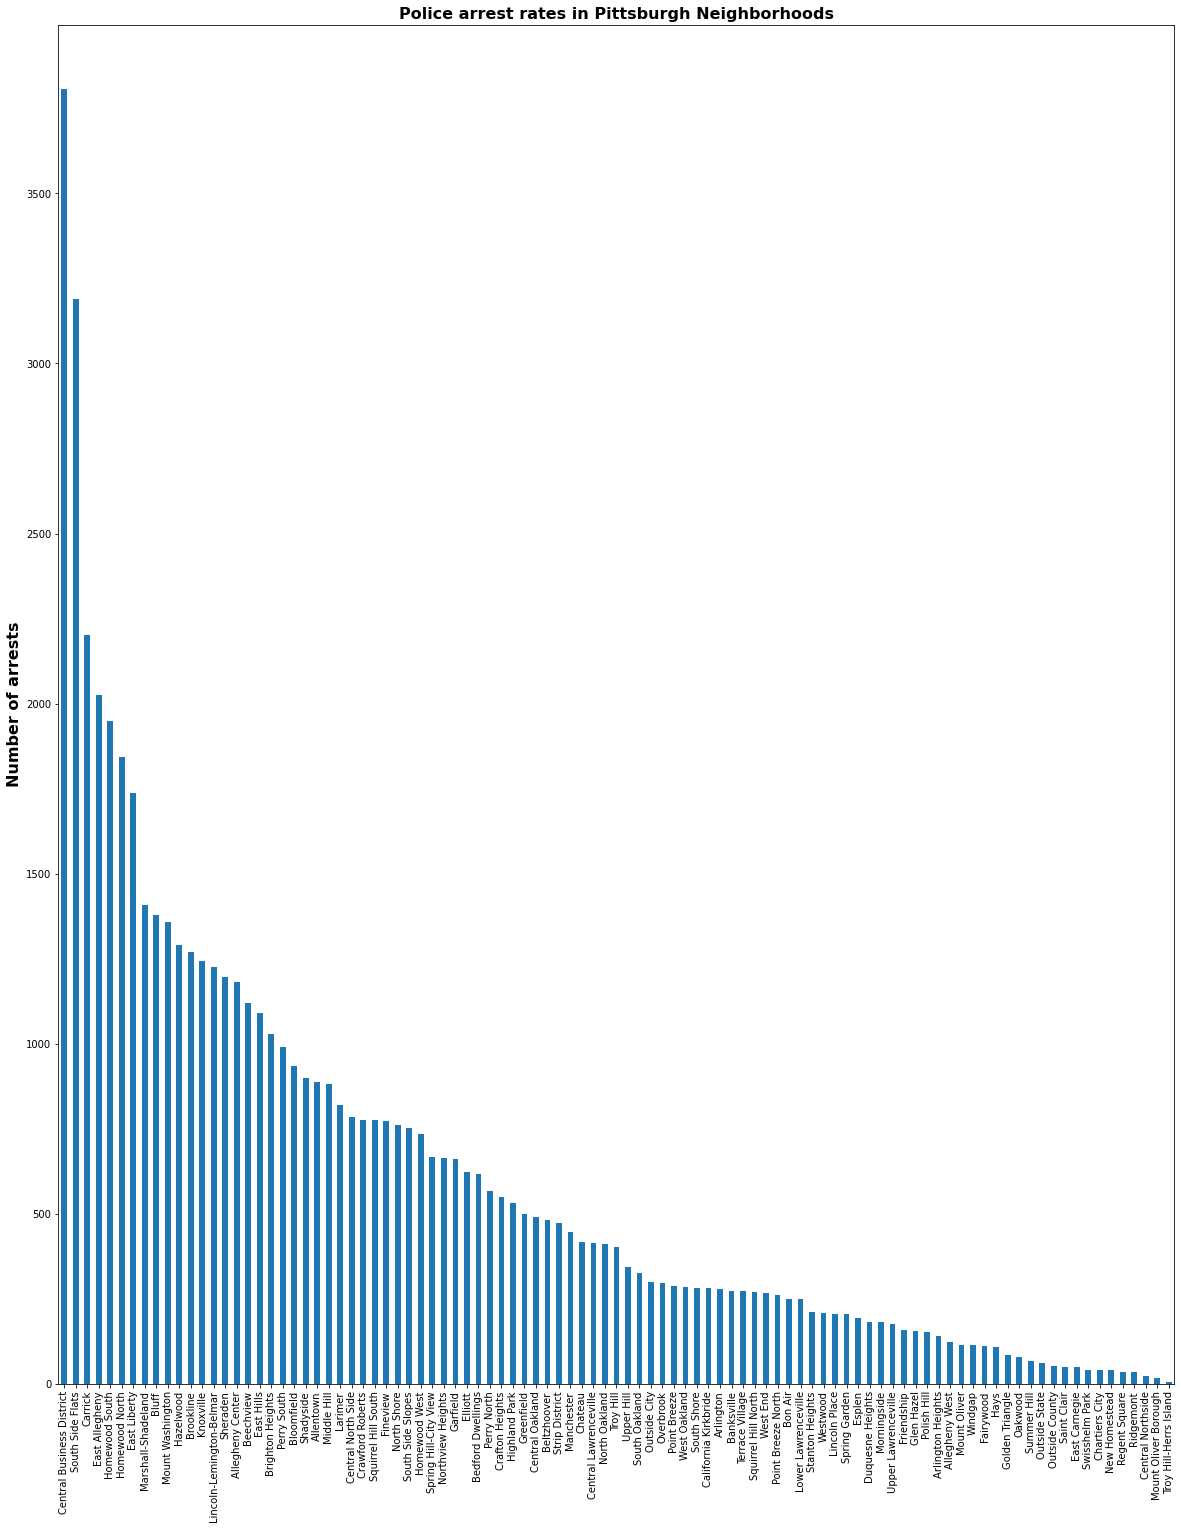

In [5]:
arrest["INCIDENTNEIGHBORHOOD"].value_counts().plot(kind ='bar',rot = 90, figsize = (20,25))
plt.title('Police arrest rates in Pittsburgh Neighborhoods', fontsize = 16, fontweight = 'bold')
plt.ylabel('Number of arrests', fontsize = 16, fontweight = 'bold')

Text(0, 0.5, 'Number of arrests')

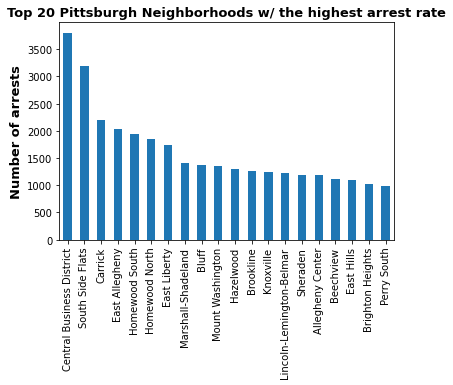

In [6]:
top_20 = (arrest['INCIDENTNEIGHBORHOOD'].value_counts()).iloc[:20]

#create bar chart to visualize top 20 values
top_20.plot(kind ='bar')
plt.title('Top 20 Pittsburgh Neighborhoods w/ the highest arrest rate', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of arrests', fontsize = 13, fontweight = 'bold')

Text(0, 0.5, 'Number of arrests')

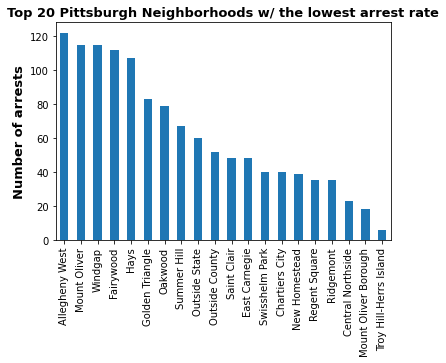

In [7]:
low20 = arrest['INCIDENTNEIGHBORHOOD'].value_counts()
low_20 = (low20.tail(20))
low_20.plot(kind ='bar')
plt.title('Top 20 Pittsburgh Neighborhoods w/ the lowest arrest rate', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of arrests', fontsize = 13, fontweight = 'bold')

In [8]:
safety_rank = arrest['INCIDENTNEIGHBORHOOD'].value_counts().rank(ascending = False)
print(safety_rank)

Central Business District     1.0
South Side Flats              2.0
Carrick                       3.0
East Allegheny                4.0
Homewood South                5.0
                             ... 
Regent Square                93.5
Ridgemont                    93.5
Central Northside            95.0
Mount Oliver Borough         96.0
Troy Hill-Herrs Island       97.0
Name: INCIDENTNEIGHBORHOOD, Length: 97, dtype: float64


## Sub-metric: Obesity

In [9]:
df = pd.read_csv('obesity_data_standardized.csv')
neighborhood_means = df.groupby('City Neighborhood')['2006-2010 estimate of obesity'].mean()
print(neighborhood_means)

City Neighborhood
Allegheny Center       0.313581
Allegheny West         0.206399
Allentown              0.353925
Arlington              0.334520
Arlington Heights      0.473120
                         ...   
Upper Lawrenceville    0.334694
West End               0.287904
West Oakland           0.366391
Westwood               0.268106
Windgap                0.340615
Name: 2006-2010 estimate of obesity, Length: 90, dtype: float64


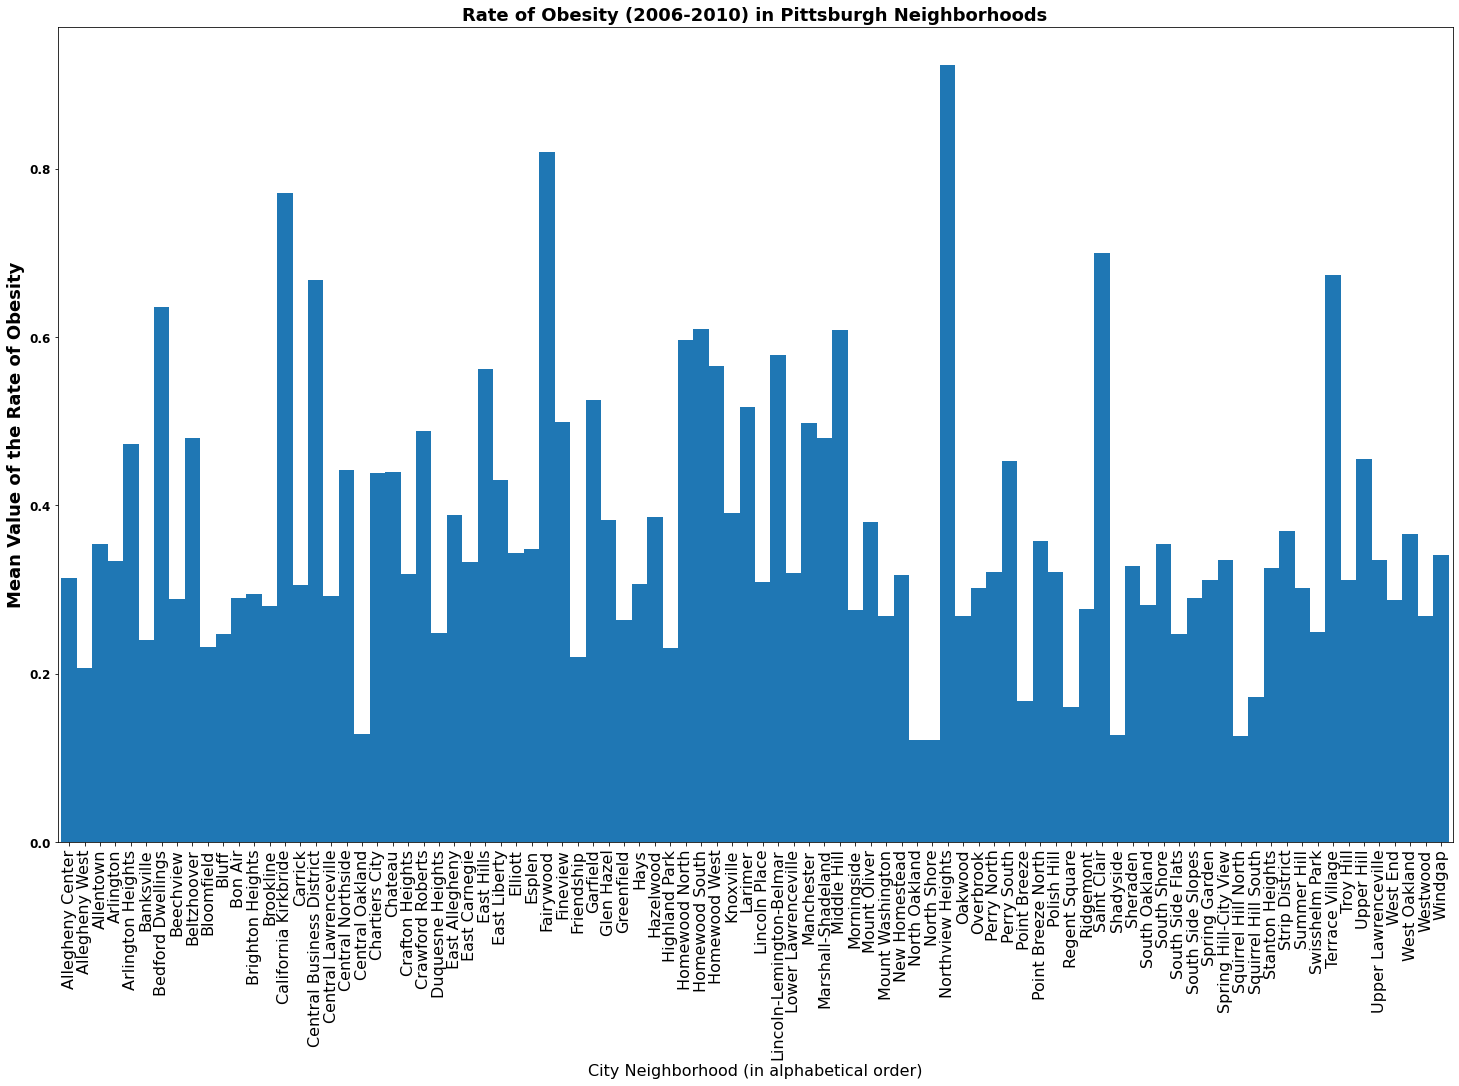

In [10]:
fig, ax = plt.subplots(figsize=(25, 15))
neighborhood_means.plot.bar(ax=ax, width=1)
plt.xlabel('City Neighborhood (in alphabetical order)', fontsize=16)
plt.ylabel('Mean Value of the Rate of Obesity', fontsize=18, fontweight='bold')
plt.title('Rate of Obesity (2006-2010) in Pittsburgh Neighborhoods', fontsize=18, fontweight='bold')
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=12, fontweight='bold')
plt.show()

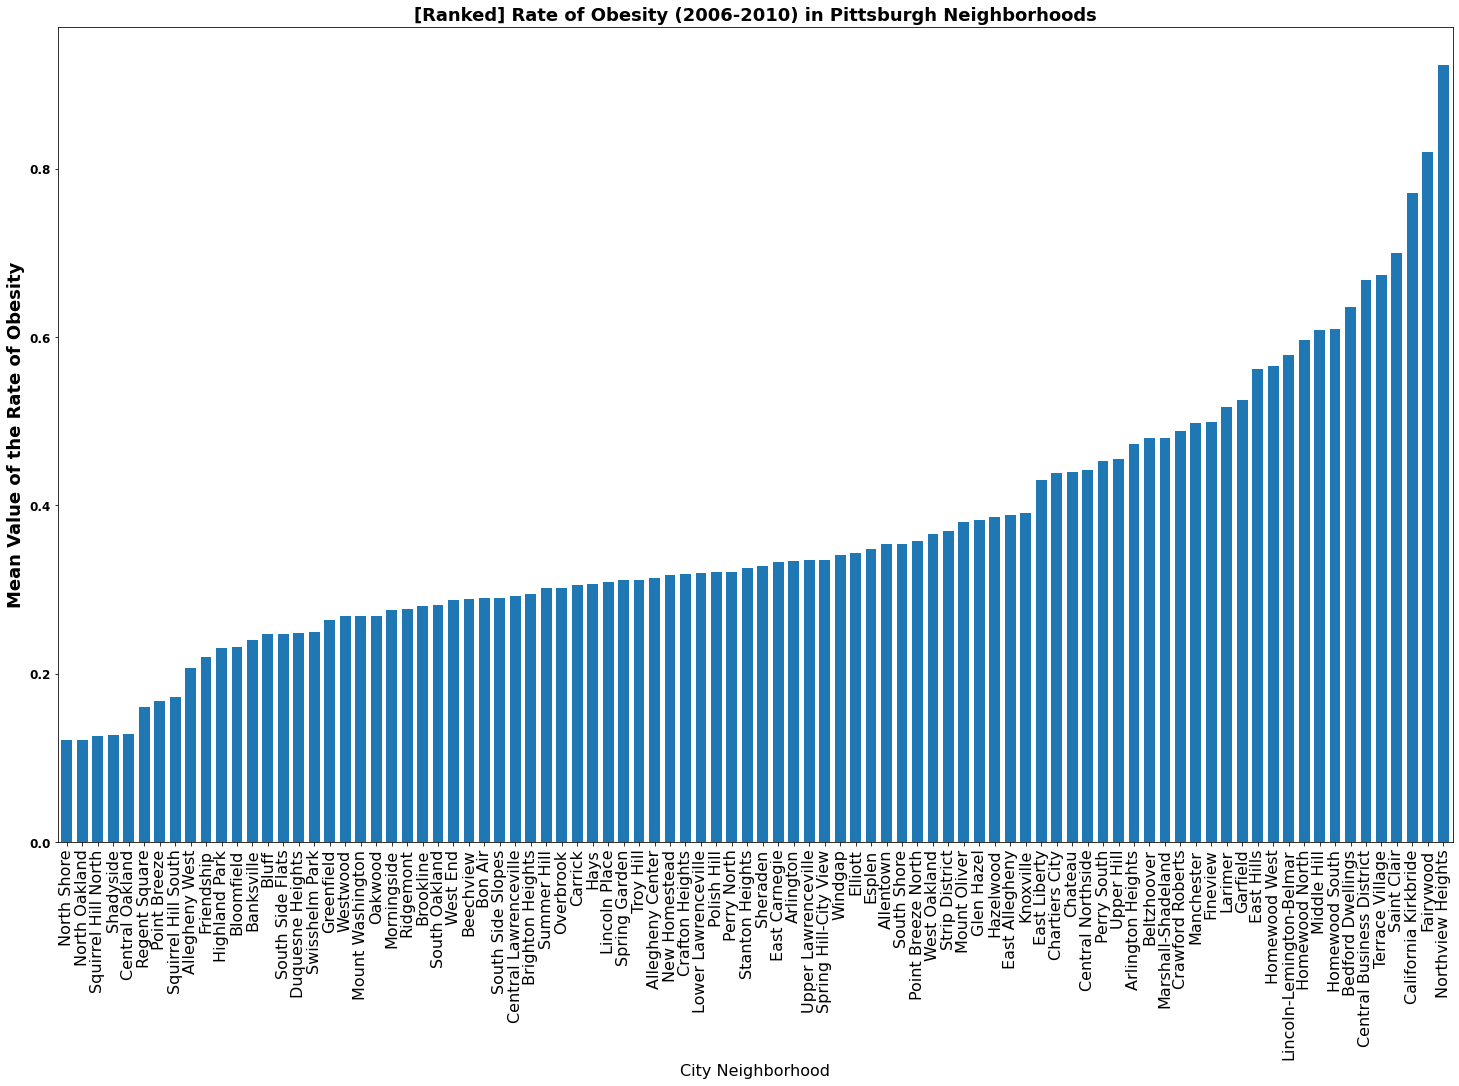

In [11]:
neighborhood_means = neighborhood_means.sort_values()

fig, ax = plt.subplots(figsize=(25, 15))
neighborhood_means.plot.bar(ax=ax, width=0.7)
plt.xlabel('City Neighborhood', fontsize=16)
plt.ylabel('Mean Value of the Rate of Obesity', fontsize=18, fontweight='bold')
plt.title('[Ranked] Rate of Obesity (2006-2010) in Pittsburgh Neighborhoods', fontsize=18, fontweight='bold')
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=12, fontweight='bold')
plt.show()

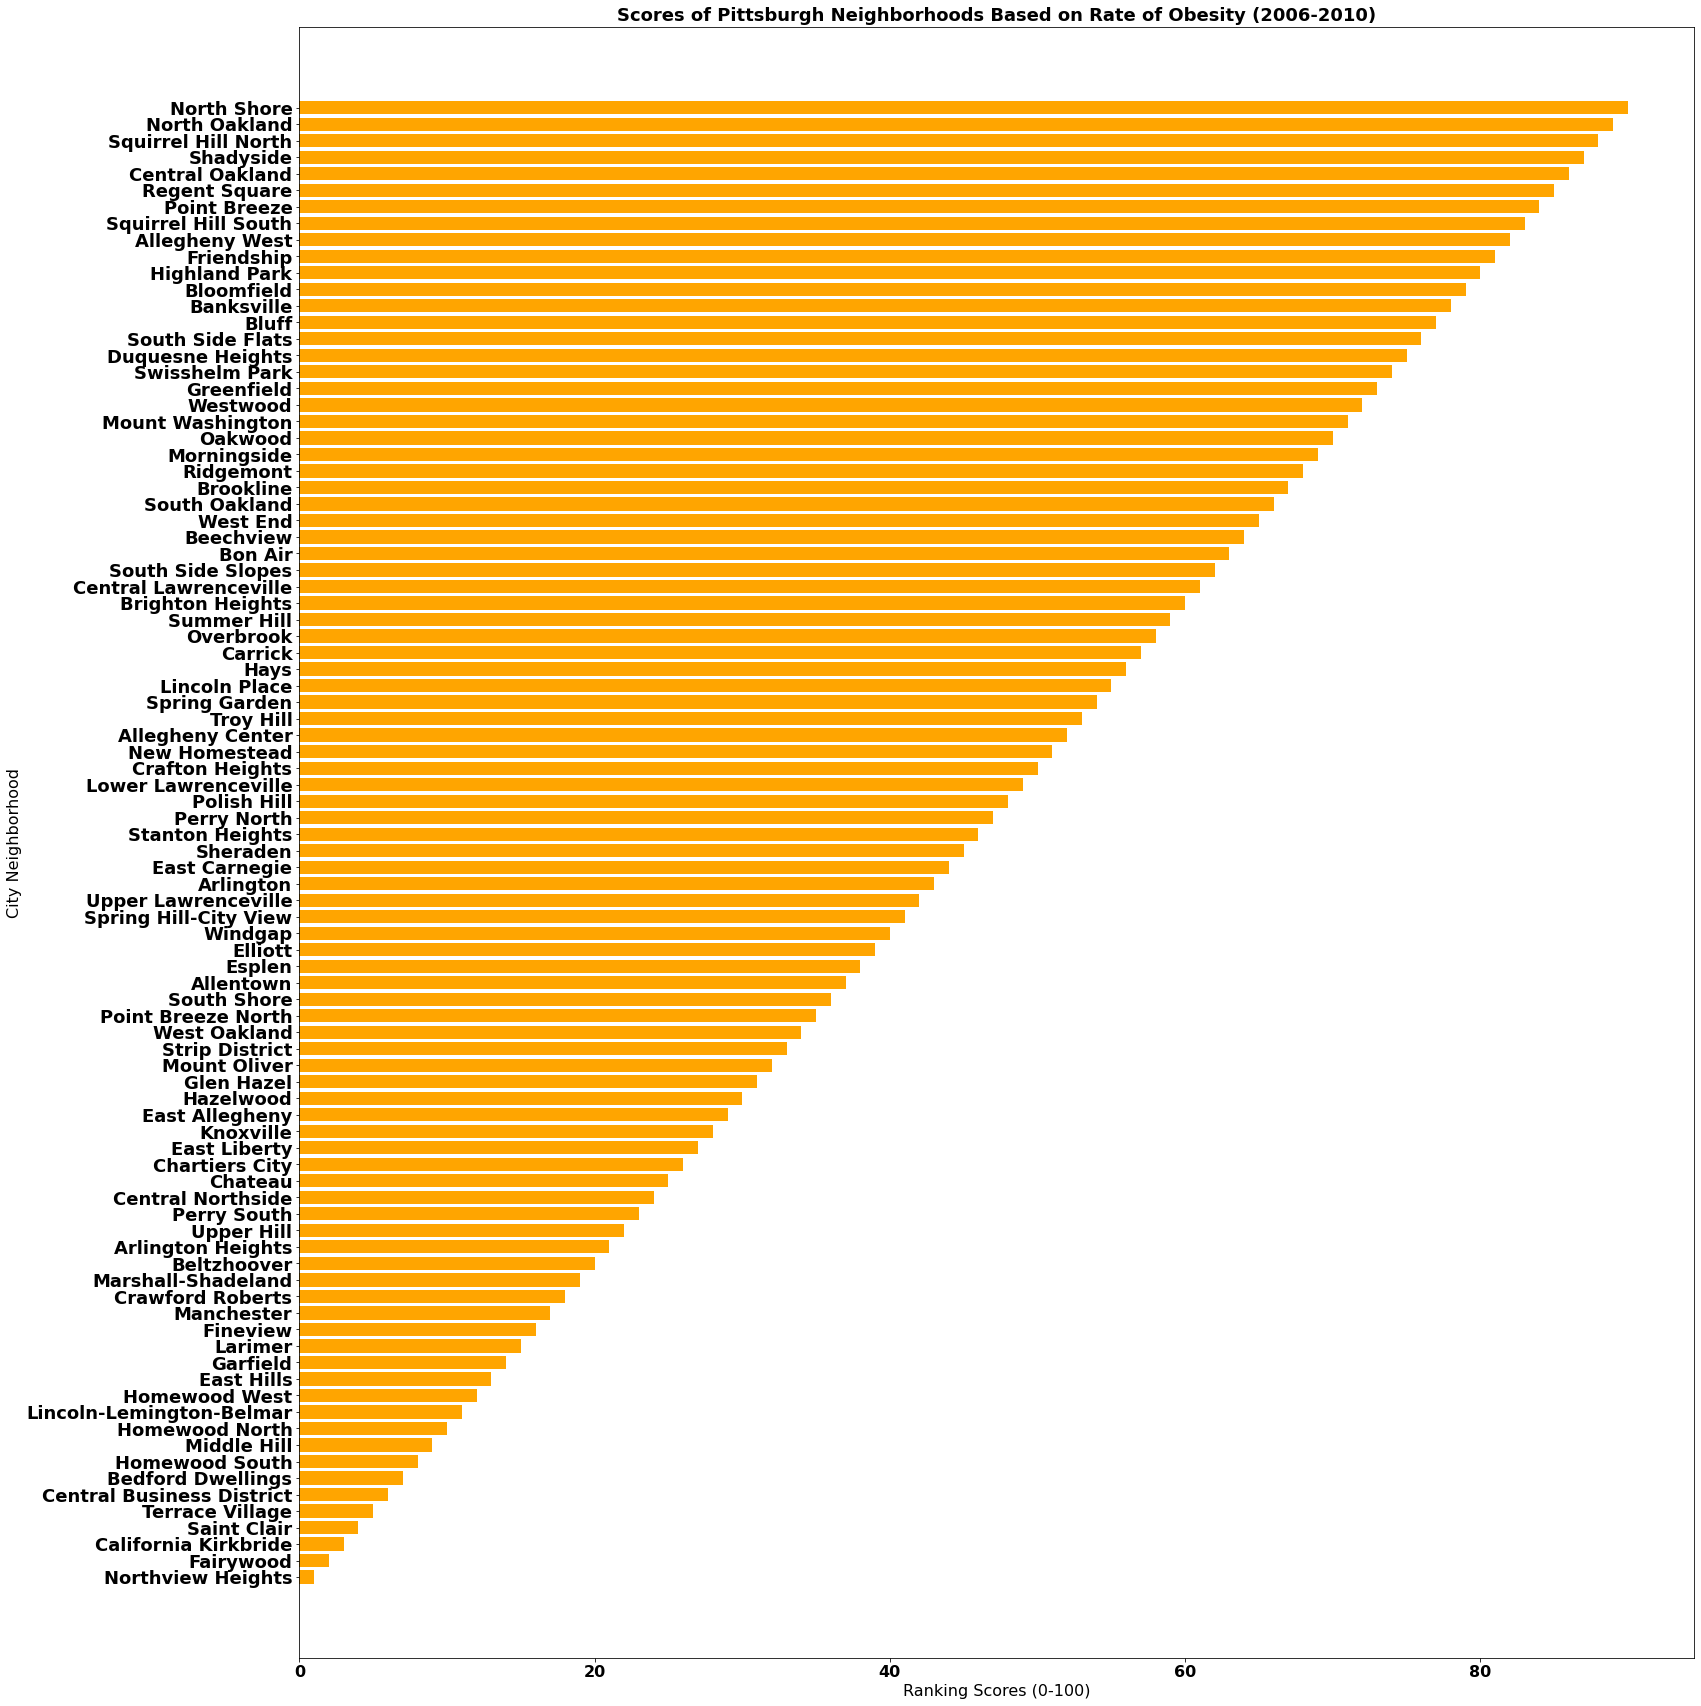

In [12]:
obesity_rank = neighborhood_means.rank(ascending=False)
obesity_rank = obesity_rank.sort_values()

fig, ax = plt.subplots(figsize=(25, 30))
ax.barh(obesity_rank.index, obesity_rank.values, color='orange')
plt.xlabel('Ranking Scores (0-100)', fontsize=16)
plt.ylabel('City Neighborhood', fontsize=16)
plt.title('Scores of Pittsburgh Neighborhoods Based on Rate of Obesity (2006-2010)', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.show()

## Sub-metric: Home Income

In [13]:
neib = pd.read_csv('neib_Data.csv')
neib

,SNAP_All_csv_Neighborhood,Median_Home_Value,Change_Real_Value
0,Central Oakland,144350,0.836
1,North Oakland,273000,-0.031
2,West Oakland,61100,0.016
3,Crawford-Roberts,94600,0.055
4,Strip District,161800,-0.408
...,...,...,...
80,Fairywood,72800,0.223
81,Chartiers City,76700,-0.042
82,Ridgemont,90500,0.017
83,West End,29800,-0.122


In [14]:
sort_by_value = neib.sort_values("Median_Home_Value")
print(sort_by_value.head(15))
print("")

sort_by_change = neib.sort_values("Change_Real_Value")
print(sort_by_change.head(15))

   SNAP_All_csv_Neighborhood  Median_Home_Value  Change_Real_Value
16                     Bluff              21200             -0.588
83                  West End              29800             -0.122
72             Homewood West              34500             -0.291
43                   Larimer              34850             -0.316
71            Homewood North              35450             -0.261
11               Beltzhoover              36000             -0.164
55                 Knoxville              39900             -0.125
20                East Hills              40700             -0.369
49                 St. Clair              41100             -0.279
14                 Allentown              42200             -0.028
19  Lincoln-Lemington-Belmar              43767             -0.229
48                 Arlington              44200             -0.100
26             Spring Garden              48000              0.272
70            Homewood South              48400              0

In [15]:
sort_neib_value = []
sort_neib_change = []

for i, row in sort_by_value.iterrows():
    sort_neib_value.append(row['SNAP_All_csv_Neighborhood'])

for i, row in sort_by_change.iterrows():
    sort_neib_change.append(row['SNAP_All_csv_Neighborhood'])
    
df_value = pd.DataFrame(sort_neib_value, columns=['Neighborhoods'])
df_change = pd.DataFrame(sort_neib_change, columns=['Neighborhoods'])

print("This is the new data frame sorted by median household income from the lowest to the highest:")
print(df_value)
print("")

print("This is the new data frame sorted by the change percentage of the median household income from the lowest to the highest:")
print(df_change)

This is the new data frame sorted by median household income from the lowest to the highest:
          Neighborhoods
0                 Bluff
1              West End
2         Homewood West
3               Larimer
4        Homewood North
..                  ...
80  Squirrel Hill South
81         Point Breeze
82            Shadyside
83        North Oakland
84  Squirrel Hill North

[85 rows x 1 columns]

This is the new data frame sorted by the change percentage of the median household income from the lowest to the highest:
                Neighborhoods
0                       Bluff
1              Strip District
2              Allegheny West
3                  East Hills
4                     Larimer
..                        ...
80  Central Business District
81            Central Oakland
82                Middle Hill
83       California-Kirkbride
84          Bedford Dwellings

[85 rows x 1 columns]


In [16]:
dic = {}
for i, row in df_value.iterrows():
    dic[row['Neighborhoods']] = 0.7 * (i+1)
    
for i, row in df_change.iterrows():
    if row['Neighborhoods'] in dic:
        dic[row['Neighborhoods']] = dic[row['Neighborhoods']] + 0.3 * (i+1)
        
df_total_score = pd.DataFrame({'Neighborhoods': list(dic.keys()), 'Score': list(dic.values())})
sort_by_score = df_total_score.sort_values("Score")

print("This is the new dataframe sorted by neighborhoods' scores from the lowest to the highest:")
print(sort_by_score)
print("")

print("Here are our final top 10 neighborhoods with their scores:")
sort_by_score.tail(10)

This is the new dataframe sorted by neighborhoods' scores from the lowest to the highest:
       Neighborhoods  Score
0              Bluff    1.0
2      Homewood West    3.9
3            Larimer    4.3
1           West End    5.6
4     Homewood North    5.9
..               ...    ...
75  South Side Flats   76.9
78     Highland Park   76.9
74   Central Oakland   77.1
79     Regent Square   78.8
82         Shadyside   80.6

[85 rows x 2 columns]

Here are our final top 10 neighborhoods with their scores:


,Neighborhoods,Score
84,Squirrel Hill North,73.6
71,Central Northside,73.8
80,Squirrel Hill South,74.1
81,Point Breeze,74.5
72,Central Business District,75.4
75,South Side Flats,76.9
78,Highland Park,76.9
74,Central Oakland,77.1
79,Regent Square,78.8
82,Shadyside,80.6


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

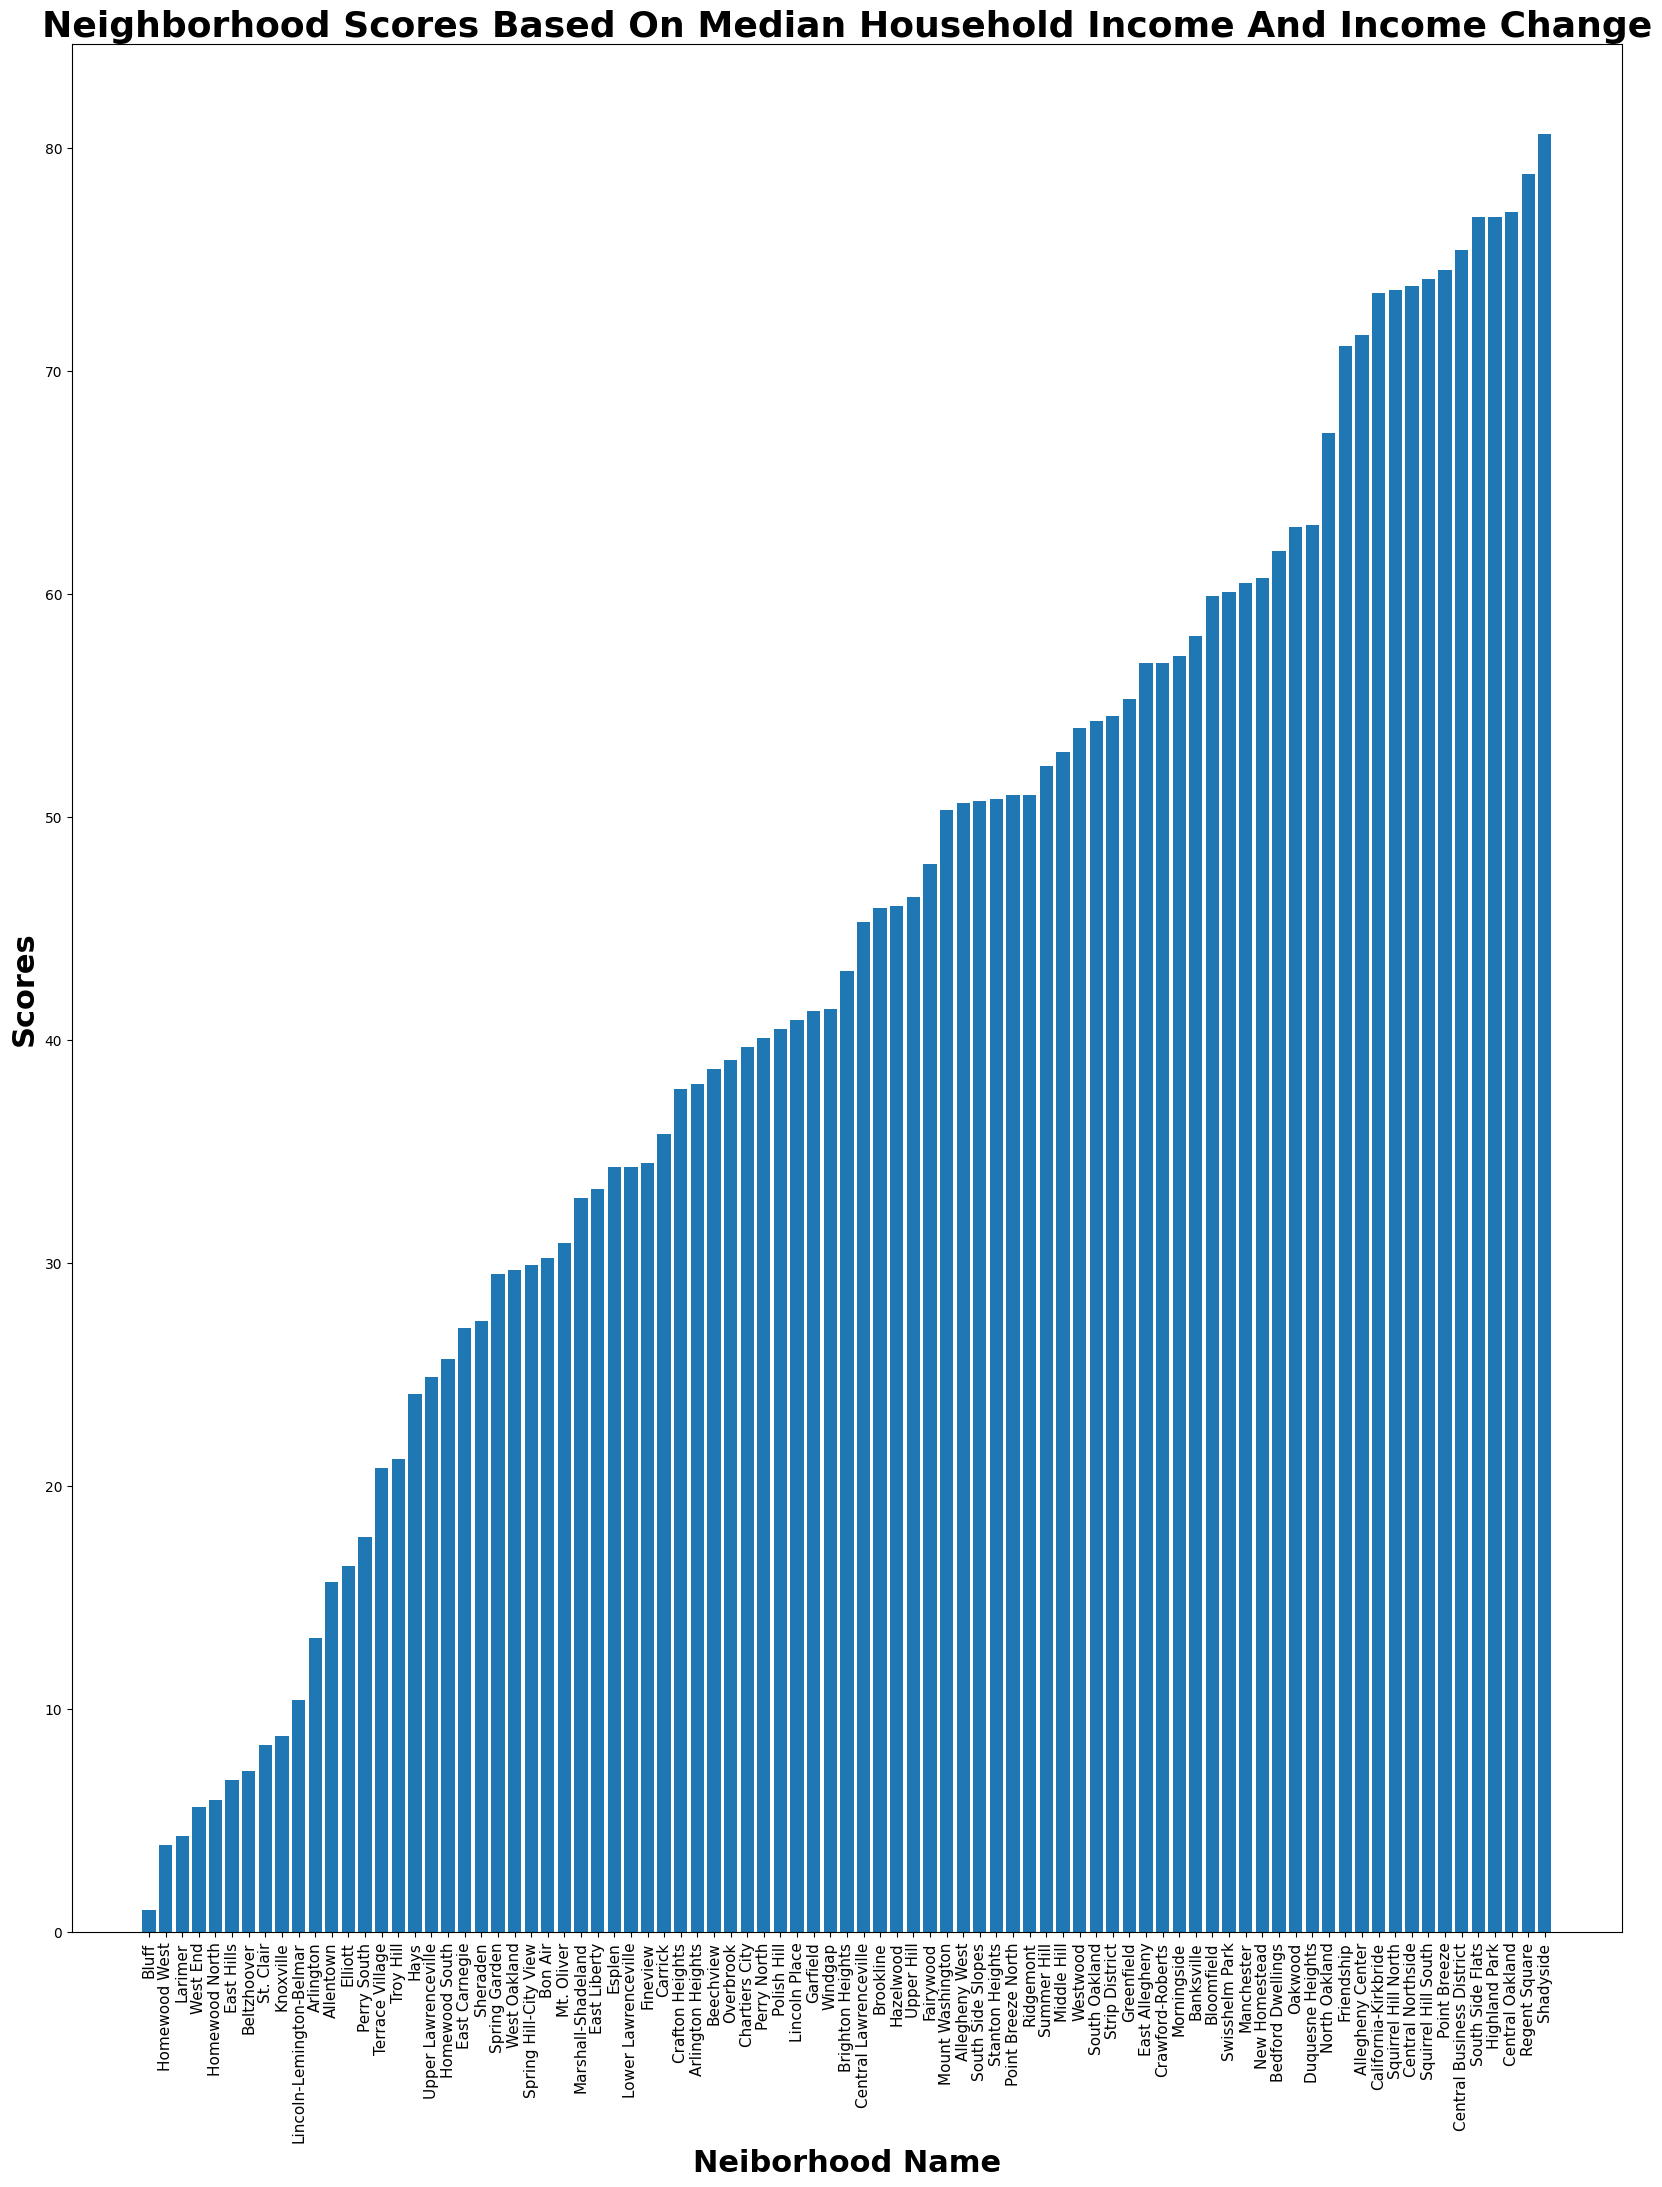

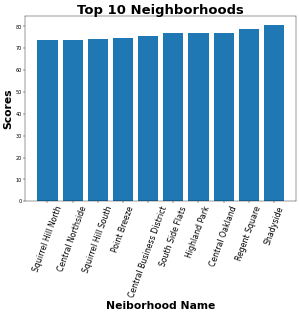

In [17]:
top_10_neighborhoods = sort_by_score.tail(10)

fig, axes = plt.subplots(figsize=(20,25), dpi=100)
plt.bar(sort_by_score.Neighborhoods, height=sort_by_score.Score)
plt.title('Neighborhood Scores Based On Median Household Income And Income Change', fontsize = 26, fontweight = 'bold')
plt.ylabel('Scores', fontsize = 22, fontweight = 'bold')
plt.xlabel('Neiborhood Name', fontsize = 22, fontweight = 'bold')
plt.xticks(rotation=90, fontsize = 11)

fig, axes = plt.subplots(figsize=(10,7), dpi=35)
plt.bar(top_10_neighborhoods.Neighborhoods, height=top_10_neighborhoods.Score)
plt.title('Top 10 Neighborhoods', fontsize = 27, fontweight = 'bold')
plt.ylabel('Scores', fontsize = 22, fontweight = 'bold')
plt.xlabel('Neiborhood Name', fontsize = 22, fontweight = 'bold')
plt.xticks(rotation=70, fontsize = 16)

## Sub-metric: Enrollment by School and Neighborhood

In [18]:
parking= pd.read_csv("enrollment_data_standardized.csv")
parking.head(30) 

,neighborhood,school,enrolled_students
0,Allegheny Center,Other,50
1,Allegheny Center,PITTSBURGH KING PreK-8,34
2,Allentown,Other,96
3,Allentown,PITTSBURGH GRANDVIEW PreK-5,76
4,Allentown,PITTSBURGH SOUTH HILLS 6-8,50
5,Allentown,PITTSBURGH CARRICK HIGH SCHOOL,35
6,Allentown,PITTSBURGH CARMALT PreK-8,21
7,Allentown,PITTSBURGH OBAMA IB 6-12,11
8,Arlington,PITTSBURGH ARLINGTON PreK-8,61
9,Arlington,Other,56


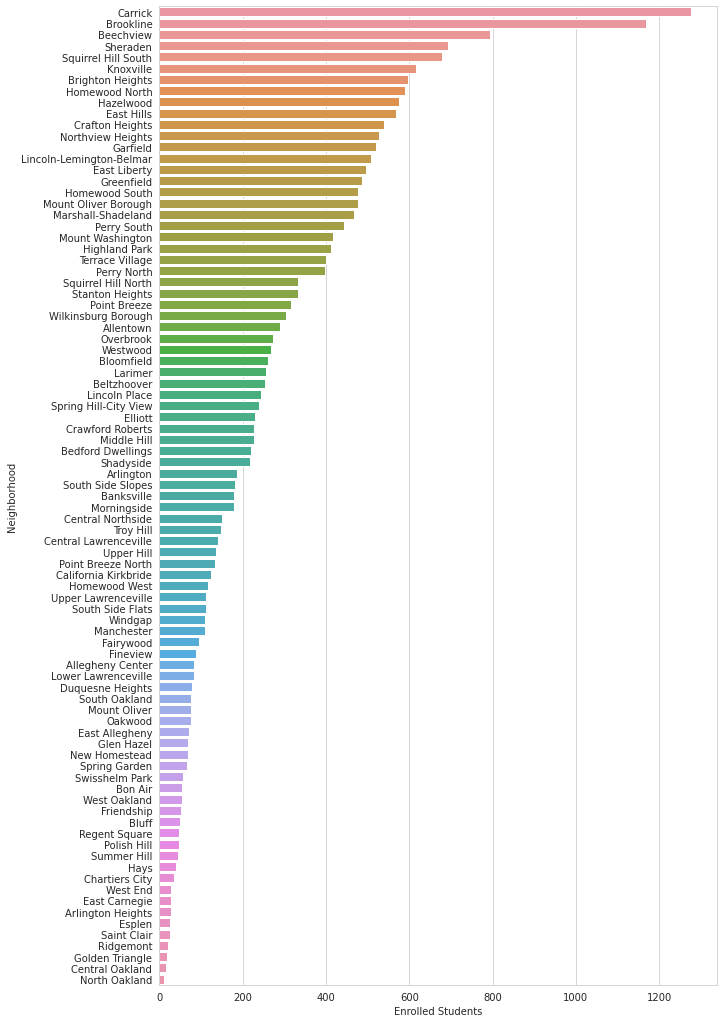

In [19]:
neighborhood_totals = parking.groupby('neighborhood')['enrolled_students'].sum()
neighborhood_totals_sorted = neighborhood_totals.sort_values(ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(10,18))
sns.barplot(x=neighborhood_totals_sorted.values, y=neighborhood_totals_sorted.index)
plt.xlabel('Enrolled Students')
plt.ylabel('Neighborhood')
plt.show()

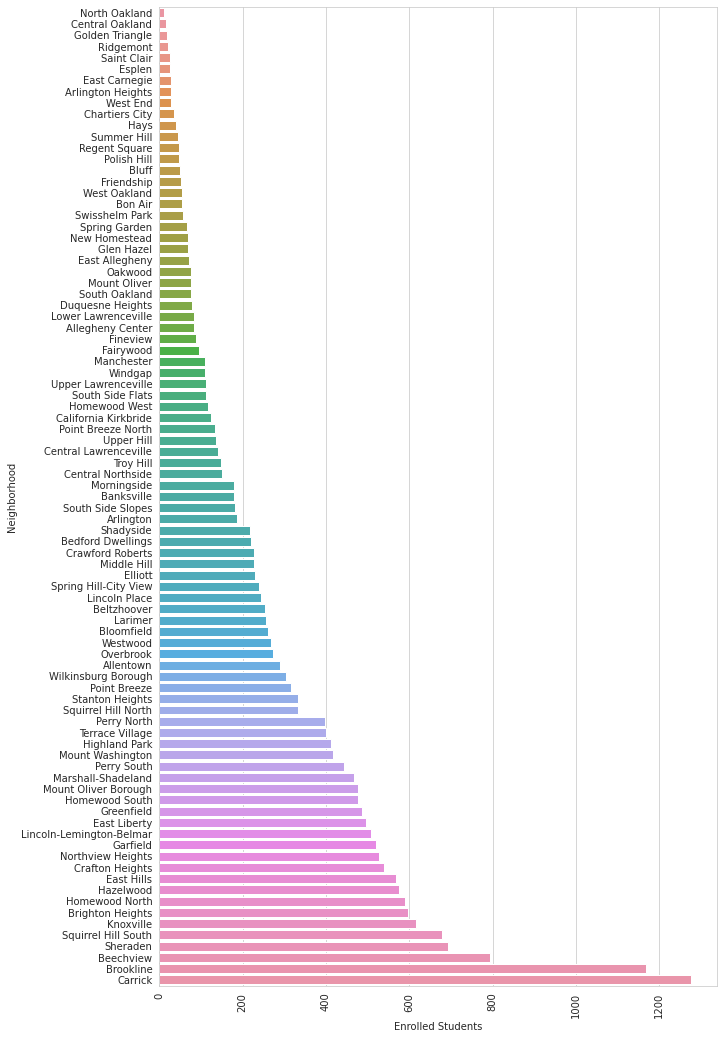

In [20]:
Total_neighborhood = parking.groupby('neighborhood')['enrolled_students'].sum()
neighborhood_totals_sorted = Total_neighborhood.sort_values()
sns.set_style("whitegrid")
plt.figure(figsize=(10,18))
plot = sns.barplot(x=neighborhood_totals_sorted.values, y=neighborhood_totals_sorted.index)
plot.set(xlabel='Enrolled Students', ylabel='Neighborhood')

plt.xticks(rotation=90)

plt.show()

In [21]:
school_enrollment_rank = parking['neighborhood'].value_counts().rank(ascending = False)
print(school_enrollment_rank)

Carrick             1.0
East Liberty        2.5
Knoxville           2.5
Brookline           4.0
Garfield            5.0
                   ... 
Esplen             82.5
Bluff              82.5
Golden Triangle    82.5
Saint Clair        82.5
Ridgemont          82.5
Name: neighborhood, Length: 87, dtype: float64


In [24]:
pd.set_option('display.max_rows', None)
total_scores = safety_rank * 1/3 + obesity_rank *1/3 + school_enrollment_rank *1/3
print(total_scores.sort_values(ascending=False))

Regent Square                83.166667
Ridgemont                    81.333333
Swisshelm Park               78.500000
Summer Hill                  75.500000
Friendship                   75.333333
North Oakland                73.166667
Duquesne Heights             72.333333
East Carnegie                71.666667
Oakwood                      71.000000
Central Oakland              70.166667
Hays                         69.666667
New Homestead                67.333333
Chartiers City               66.333333
West End                     66.000000
Polish Hill                  65.000000
Esplen                       63.500000
Squirrel Hill North          63.500000
Bon Air                      62.166667
Upper Lawrenceville          62.000000
Lower Lawrenceville          61.500000
Spring Garden                60.666667
South Oakland                58.666667
Morningside                  58.500000
Saint Clair                  58.333333
Lincoln Place                57.500000
Banksville               